In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

In [10]:
import pandas as pd

# Read the datasets
credit_card_data = pd.read_csv('Credit_Card.csv')
credit_label_data = pd.read_csv('Credit_card_label.csv')

# Merge the datasets on the common identifier
merged_data = pd.merge(credit_card_data, credit_label_data, how='inner')

# Now, 'merged_data' contains information from both datasets based on the common identifier
merged_data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [11]:
merged_data.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [12]:
# Let's explore the data
merged_data.dropna(subset=['GENDER', 'Type_Occupation', 'Annual_income', 'Birthday_count'], inplace=True)
df = merged_data

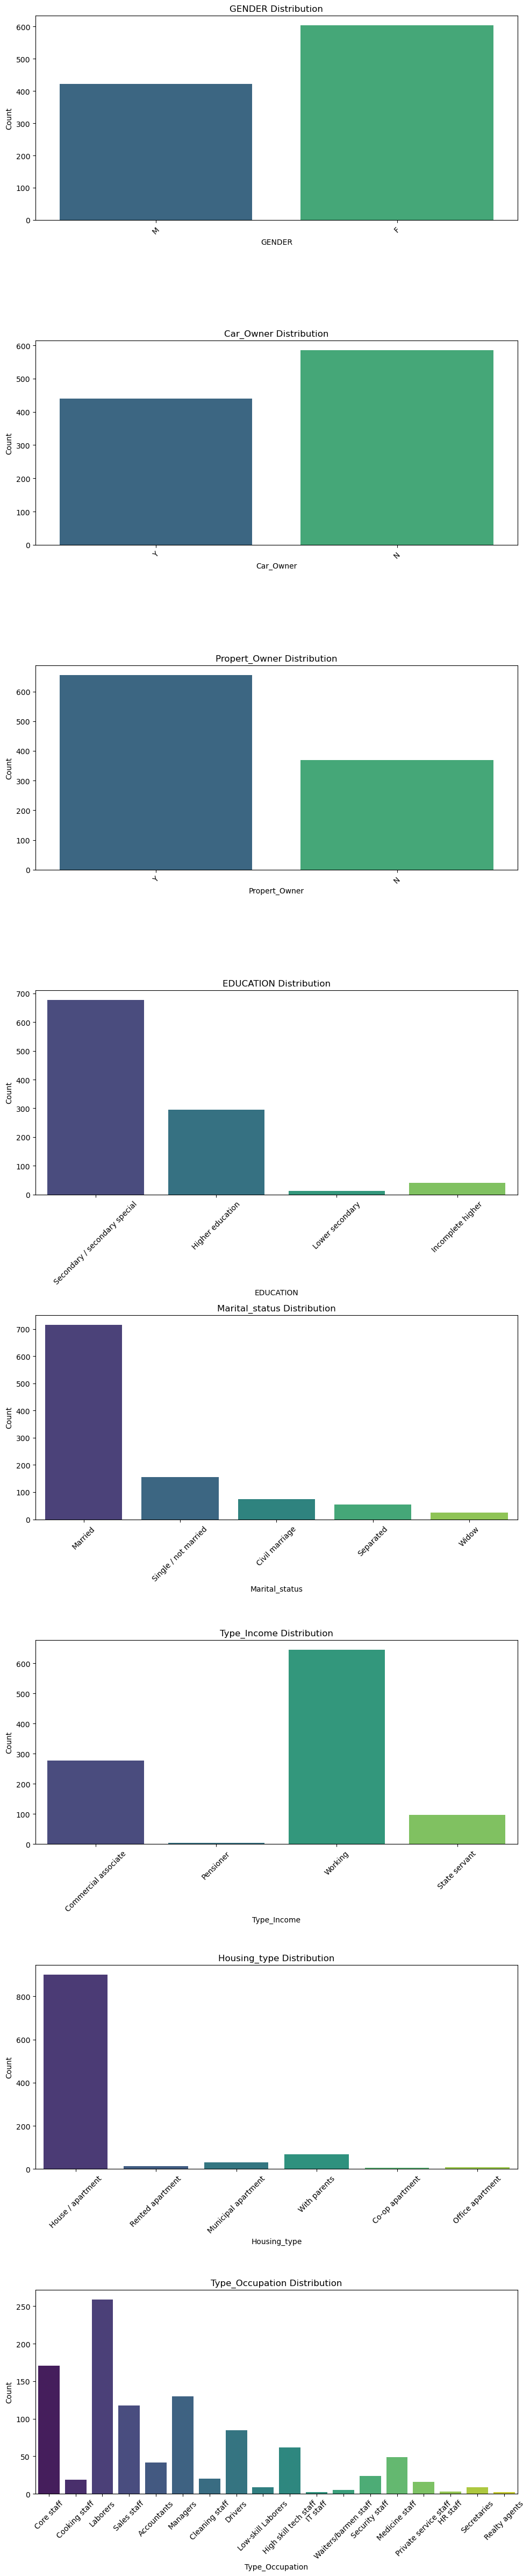

In [13]:
# List of categorical column names
categorical_columns = ['GENDER', 'Car_Owner', 'Propert_Owner', 'EDUCATION', 'Marital_status', 'Type_Income', 'Housing_type', 'Type_Occupation']

# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 6 * len(categorical_columns)))

# Create count plots for each categorical column
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue=col, palette='viridis', legend=False)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

    # Rotate x-labels
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


### GENDER: More females than males but good proportion in both
### CAR_OWNER DISTRIBUTION: More No than Yes, similar proportion to GENDER
### PROPERT_OWNER DISTRIBUTION: Mores Yes than no, similar proportion to previous features.
### EDUCATION_DISTRIBUTION: MOST OF THE DATA varies between Secondary and Higher education.
### MARITAL_STATUS: Most of the people is married
### TYPE_INCOME: THE MAJORITY IS WORKING THE SECONDARY TYPE IS COMMERCIAL ASSOCIATE
### HOUSING_TYPE_DISTRIBUTION : MOST OF THE DATA LIVES IN AN OWNED HOUSE/APARTMENT
### TYPE_OCCUPATION: THERE IS MORE THAN 100 PEOPLE WORKING IN 'CORE STAFF', 'LABORERS', 'SALES STAFF', 'MANAGERS'.

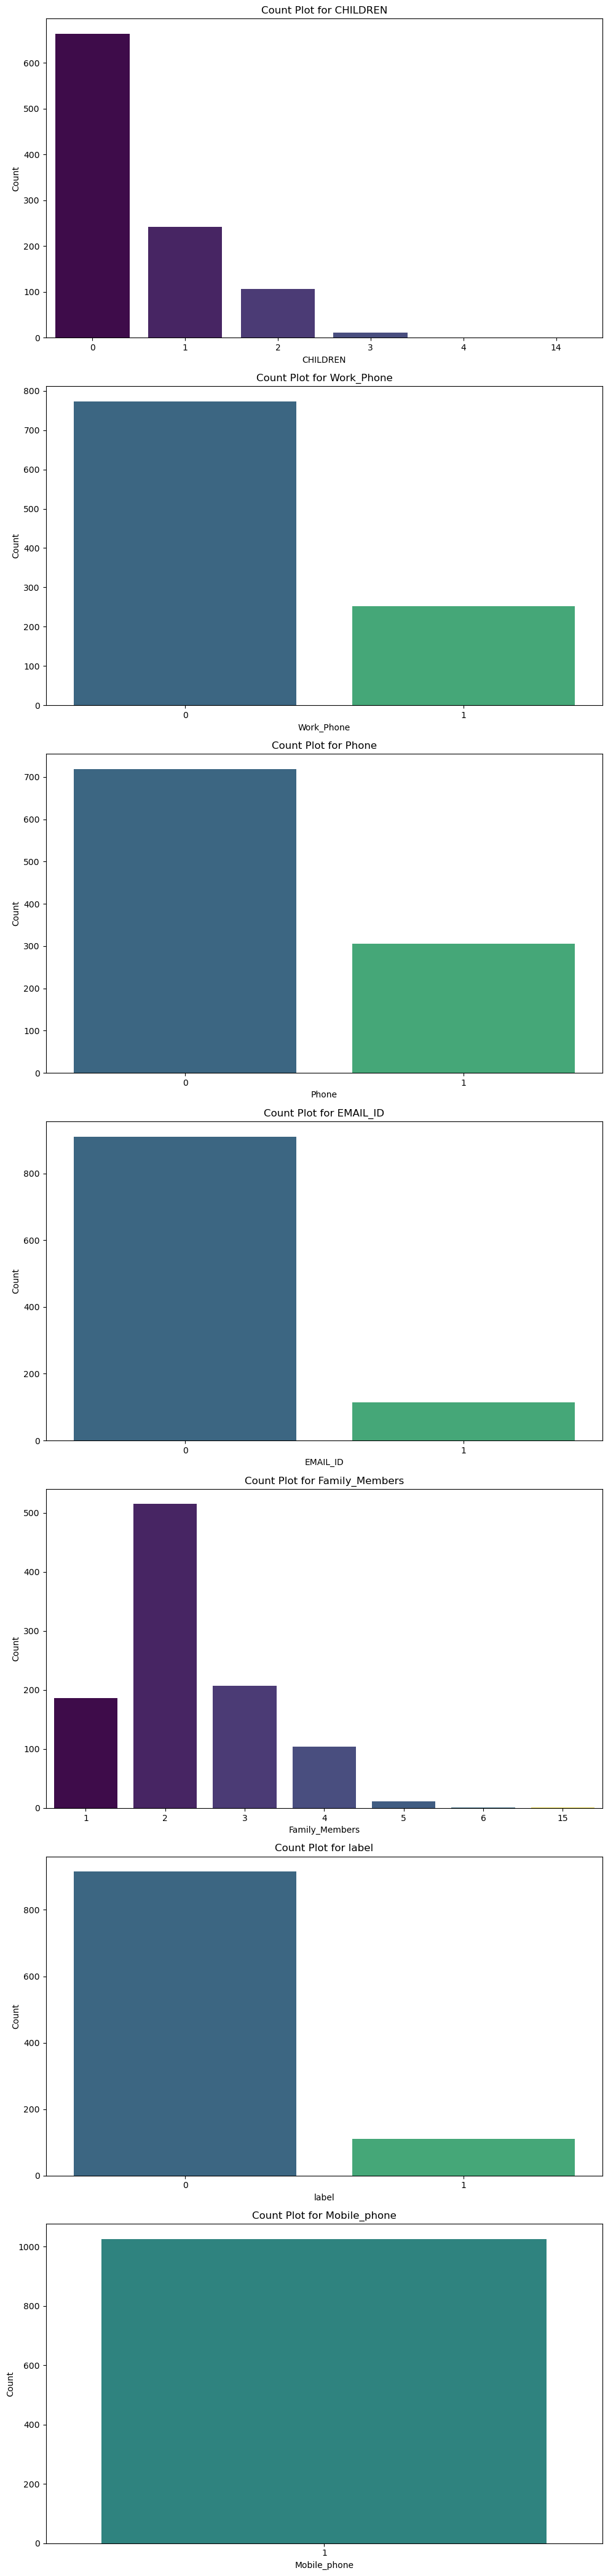

In [14]:
discrete_columns = ['CHILDREN', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'label', 'Mobile_phone']

# Set up subplots
fig, axes = plt.subplots(nrows=len(discrete_columns), ncols=1, figsize=(10, 6 * len(discrete_columns)))

# Create count plots for each discrete column
for i, col in enumerate(discrete_columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue=col, palette='viridis', legend=False)
    axes[i].set_title(f'Count Plot for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

### THE POSITIVE CASES FOR CREDIT CARD APPROVAL IS CONSIDERABLY LESS, SO WE SHOULD DO OVERSAMPLING TO BALANCE THE CLASS DISTRIBUTION AND HENCE, IMPROVE THE MODEL PERFORMANCE 

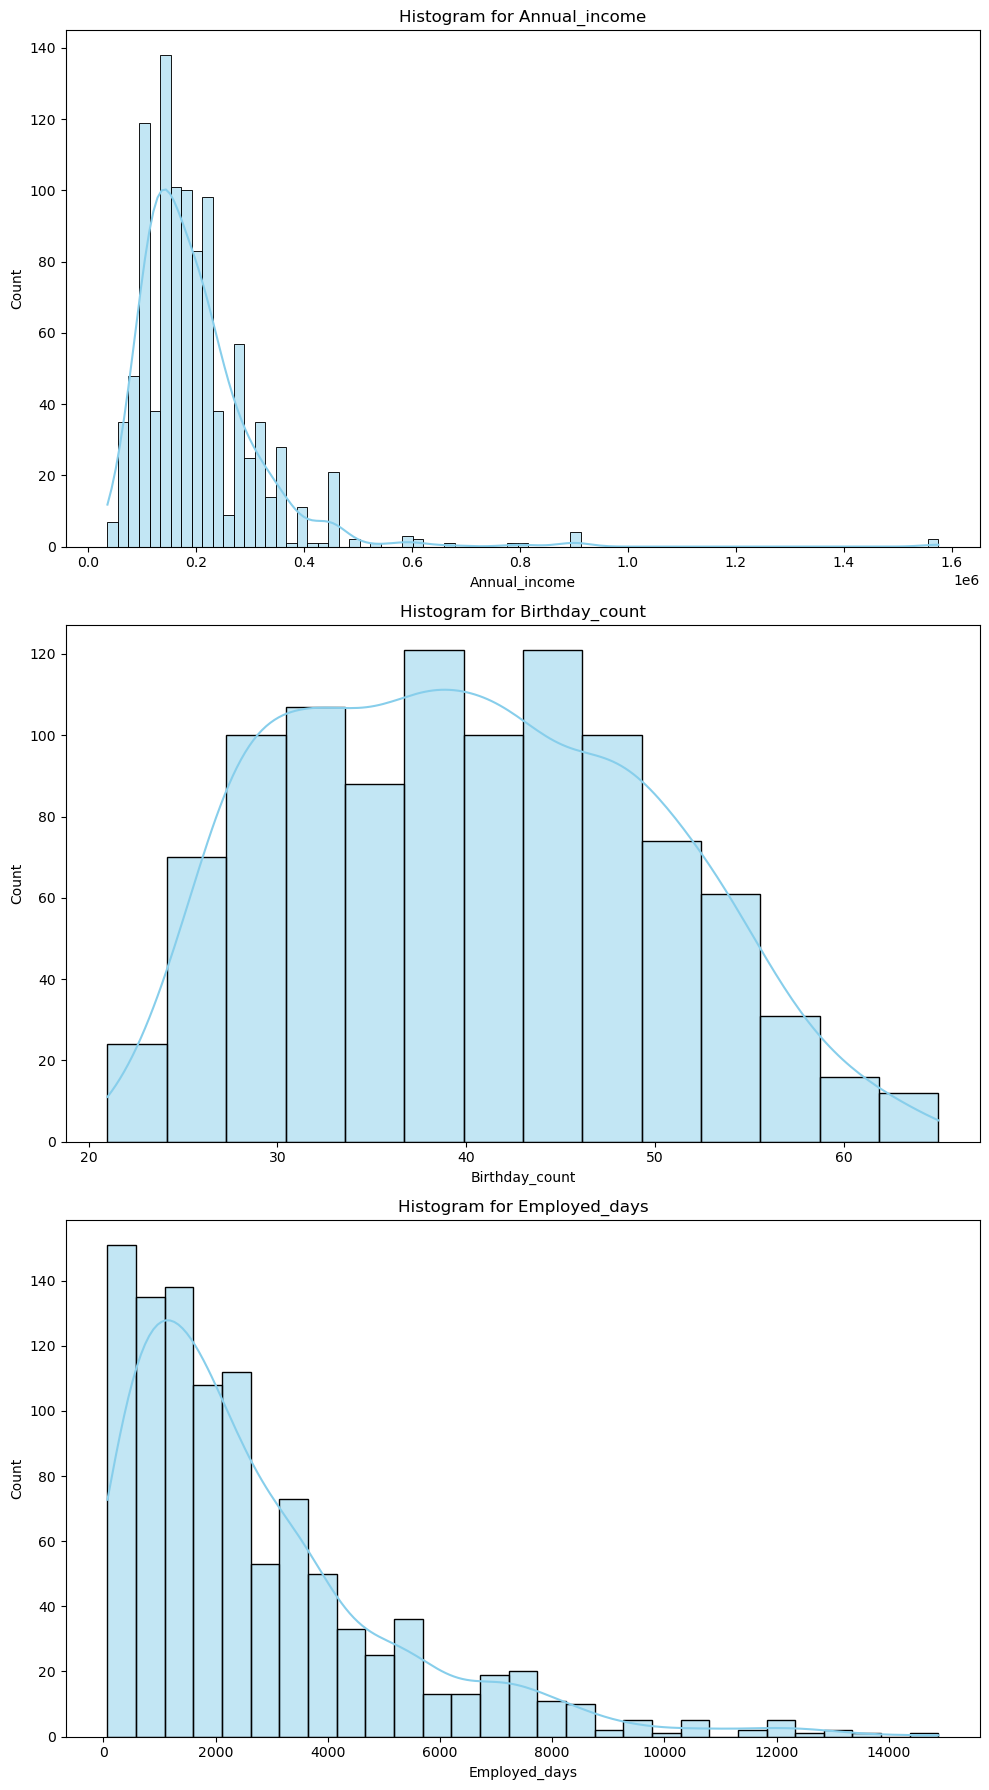

In [15]:
# List of continuous column names
df['Birthday_count'] = -df['Birthday_count'] // 365 # Transform the birthday_count into days
#df['EmployedDaysOnly'] = df.Employed_days.apply(lambda x: x if x > 0 else 0)
df['Employed_days'] = df.Employed_days.apply(lambda x: abs(x) if x < 0 else 0)
continuous_columns = ['Annual_income', 'Birthday_count', 'Employed_days']

# Set up subplots
fig, axes = plt.subplots(nrows=len(continuous_columns), ncols=1, figsize=(10, 6 * len(continuous_columns)))

# Create histograms for each continuous column
for i, col in enumerate(continuous_columns):
    sns.histplot(df[col], ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f'Histogram for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

In [17]:
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
8,5010864,1,1,1,1,450000.0,0,3,1,1,49.0,678,1,0,1,1,3,3,1
9,5010868,1,1,1,1,450000.0,1,3,1,1,49.0,678,1,0,1,1,3,3,1
10,5010869,1,1,1,1,450000.0,0,3,3,1,49.0,678,1,0,1,1,3,1,1
11,5018498,0,1,1,0,90000.0,3,3,1,1,51.0,1002,1,1,1,0,2,2,1
13,5018503,0,1,1,0,90000.0,3,3,1,1,51.0,1002,1,1,1,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,5024049,0,1,1,1,144000.0,3,0,1,1,35.0,2924,1,0,0,0,0,3,0
1542,5118268,1,1,0,1,360000.0,2,3,1,1,30.0,3536,1,0,1,0,4,3,0
1544,5023655,0,0,0,0,225000.0,0,1,3,1,28.0,1209,1,0,0,0,0,1,0
1545,5115992,1,1,1,2,180000.0,3,0,1,1,36.0,2477,1,0,0,0,10,4,0


In [262]:
dfa = df
dfa = df[['Type_Occupation', 'Annual_income', 'Birthday_count', 'Employed_days', 'label']]

columns_to_lowercase = ['Employed_days', 'Birthday_count', 'Annual_income', 'Type_Occupation']

# Create a copy of the DataFrame
dfa_copy = dfa.copy()

# Create a dictionary mapping current column names to lowercase column names
lowercase_column_mapping = {col: col.lower() for col in columns_to_lowercase}

# Rename the columns using the created mapping in the copied DataFrame
dfa_copy.rename(columns=lowercase_column_mapping, inplace=True)

# Now dfa_copy has the columns in lowercase, you can use it as needed
dfa = dfa_copy
dfa

,type_occupation,annual_income,birthday_count,employed_days,label
8,Core staff,450000.0,49.0,678,1
9,Core staff,450000.0,49.0,678,1
10,Core staff,450000.0,49.0,678,1
11,Cooking staff,90000.0,51.0,1002,1
13,Cooking staff,90000.0,51.0,1002,1
...,...,...,...,...,...
1540,Accountants,144000.0,35.0,2924,0
1542,Drivers,360000.0,30.0,3536,0
1544,Accountants,225000.0,28.0,1209,0
1545,Managers,180000.0,36.0,2477,0


In [263]:


dummies = pd.get_dummies(dfa['type_occupation'])
dummies = dummies.astype(int)
dummies

,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1542,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1544,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1545,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Define mappings for each categorical variable
gender_mapping = {'M': 0, 'F': 1}
yes_no_mapping = {'N': 0, 'Y': 1}
education_mapping = {'Higher education': 0, 'Secondary / secondary special': 1,
                     'Lower secondary': 2, 'Incomplete higher': 3, 'Academic degree': 4}
marital_status_mapping = {'Married': 0, 'Single / not married': 1,
                          'Civil marriage': 2, 'Separated': 3, 'Widow': 4}
type_income_mapping = {'Pensioner': 0, 'Commercial associate': 1, 'Working': 2, 'State servant': 3}
housing_type_mapping = {'House / apartment': 0, 'With parents': 1,
                        'Rented apartment': 2, 'Municipal apartment': 3,
                        'Co-op apartment': 4, 'Office apartment': 5}
type_occupation_mapping = {'Core staff': 0, 'Cooking staff': 1, 'Laborers': 2,
                           'Sales staff': 3, 'Accountants': 4, 'High skill tech staff': 5,
                           'Managers': 6, 'Cleaning staff': 7, 'Drivers': 8,
                           'Low-skill Laborers': 9, 'IT staff': 10, 'Waiters/barmen staff': 11,
                           'Security staff': 12, 'Medicine staff': 13, 'Private service staff': 14,
                           'HR staff': 15, 'Secretaries': 16, 'Realty agents': 17}

# Apply mappings to the specified columns in the DataFrame 'df'
df['GENDER'] = df['GENDER'].map(gender_mapping).fillna(-1).astype(int)
df['Car_Owner'] = df['Car_Owner'].map(yes_no_mapping).fillna(-1).astype(int)
df['Propert_Owner'] = df['Propert_Owner'].map(yes_no_mapping).fillna(-1).astype(int)
df['EDUCATION'] = df['EDUCATION'].map(education_mapping).fillna(-1).astype(int)
df['Marital_status'] = df['Marital_status'].map(marital_status_mapping).fillna(-1).astype(int)
df['Type_Income'] = df['Type_Income'].map(type_income_mapping).fillna(-1).astype(int)
df['Housing_type'] = df['Housing_type'].map(housing_type_mapping).fillna(-1).astype(int)
df['Type_Occupation'] = df['Type_Occupation'].map(type_occupation_mapping).fillna(-1).astype(int)
df

In [20]:
# Defining my input and outpput for the model

df[categorical_columns] = df[categorical_columns].apply(lambda x: x.astype('category').cat.codes)
df.rename(columns={'Birthday_count': 'Age'}, inplace=True)

y = df['label']
X = df.drop(['label', 'Ind_ID'], axis='columns')


,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Age,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
8,1,1,1,1,450000.0,0,3,1,1,49.0,678,1,0,1,1,3,3
9,1,1,1,1,450000.0,1,3,1,1,49.0,678,1,0,1,1,3,3
10,1,1,1,1,450000.0,0,3,3,1,49.0,678,1,0,1,1,3,1
11,0,1,1,0,90000.0,3,3,1,1,51.0,1002,1,1,1,0,2,2
13,0,1,1,0,90000.0,3,3,1,1,51.0,1002,1,1,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,0,1,1,1,144000.0,3,0,1,1,35.0,2924,1,0,0,0,0,3
1542,1,1,0,1,360000.0,2,3,1,1,30.0,3536,1,0,1,0,4,3
1544,0,0,0,0,225000.0,0,1,3,1,28.0,1209,1,0,0,0,0,1
1545,1,1,1,2,180000.0,3,0,1,1,36.0,2477,1,0,0,0,10,4


In [21]:
# Oversampling
X_over, y_over = RandomOverSampler().fit_resample(X, y)

# Split inot X_train and X_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=3)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV



model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [50, 55, 60, 65, 70, 100, 125]
        }
    },
       'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'criterion': ['gini','entropy','log_loss'],
            'max_depth': [None, 40, 50, 60, 70, 100],
        }  
    },
}

# Scores DataFrame to analyze which one had the better performance

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=12, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
dfs = pd.DataFrame(scores,columns=['model','best_score','best_params'])
dfs

,model,best_score,best_params
0,random_forest,0.991120,{'n_estimators': 100}
1,DecisionTreeClassifier,0.952869,"{'criterion': 'gini', 'max_depth': 70}"


In [25]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True)
rf.fit(X_train, y_train);
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import mean_absolute_error


preds = rf.predict(X_test)
mse = mean_absolute_error(preds, y_test)
oob_error = 1 - rf.oob_score_
acc = accuracy_score(y_test, preds)
f1 = f1_score(y_test, preds)

print('MSE: ', mse)
print('OOB: ', oob_error)
print('Accuracy: ', acc)
print('F1 Score: ', f1)

MSE:  0.00819672131147541
OOB:  0.010245901639344246
Accuracy:  0.9918032786885246
F1 Score:  0.9919999999999999


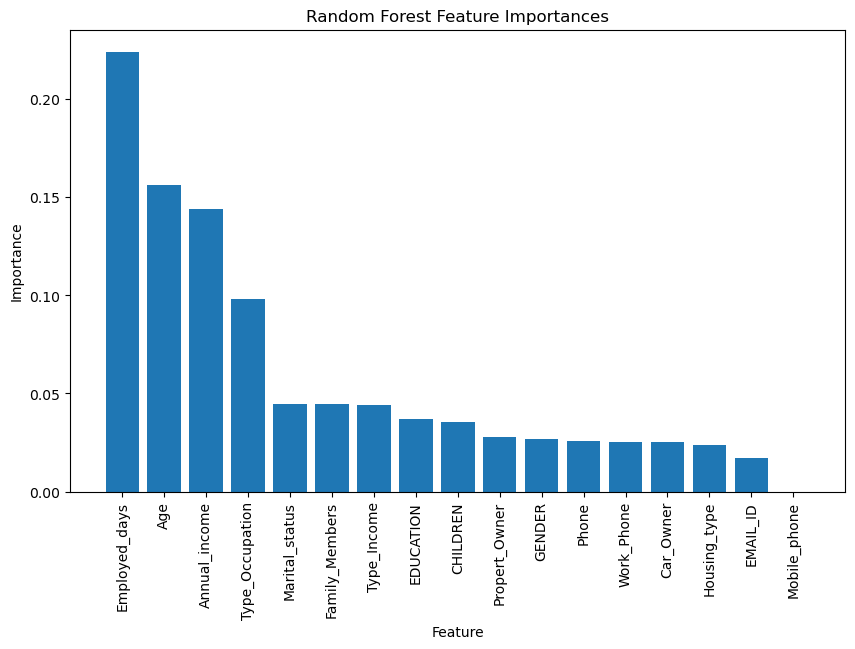

In [26]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importances")
plt.show()

## FOR THE MODEL WE CAN CONCLUDE THE 4 AND MOST IMPORTANT FEATURES ARE THE FOLLOWING:

### - Employed_days
### - Age
### - Annual_income
### - Type_Occupation

# So it's highly recommended to do a model with only this feature and see if the model can be improved.